# Office Building Energy Prediction Demonstration - Random Forest

This notebook is a demonstration of the use of the Building Data Genome Project Data to illustrate how a prediction competition using whole building electrical meter data could be set up. 

The open data set we're using for this demonstration is the Building Data Genome Project (https://github.com/buds-lab/the-building-data-genome-project)

First we'll load the *meta* data and take a look around - these data show the diversity of building types in this machine learning exercise


In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
meta = pd.read_csv("../input/meta_open.csv", index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [4]:
meta.head(30)

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
Office_Cristina,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,92271.0000,8572.252713,College/University,America/New_York,2001,Cristina,Office,weather2.csv
PrimClass_Jolie,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,212.0,Primary/Secondary Classroom,C,31505.9353,2927.000000,Primary/Secondary School,Europe/London,pre 1919,Jolie,PrimClass,weather1.csv
PrimClass_Jaylin,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,219.0,Primary/Secondary Classroom,C,47070.5347,4373.000000,Primary/Secondary School,Europe/London,1919-1945,Jaylin,PrimClass,weather1.csv
Office_Jesus,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Government,Gas,1.0,40.0,Office,C,42646.5718,3962.000000,"City, County, State",Europe/London,Post 1976,Jesus,Office,weather1.csv


In [5]:
 meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, PrimClass_Everett to UnivLab_Aoife
Data columns (total 18 columns):
dataend                   507 non-null datetime64[ns]
datastart                 507 non-null datetime64[ns]
energystarscore           26 non-null float64
heatingtype               124 non-null object
industry                  507 non-null object
mainheatingtype           122 non-null object
numberoffloors            124 non-null float64
occupants                 105 non-null float64
primaryspaceusage         507 non-null object
rating                    131 non-null object
sqft                      507 non-null float64
sqm                       507 non-null float64
subindustry               507 non-null object
timezone                  507 non-null object
yearbuilt                 313 non-null object
nickname                  507 non-null object
primaryspaceuse_abbrev    507 non-null object
newweatherfilename        507 non-null object
dtypes: datetime64[ns](2),

One can notice that there are 507 buildings and various attributes are available.

In this analysis, let's only focus on the Office Buildings with one full year of data in 2015

In [6]:
meta.datastart.value_counts()

2015-01-01    225
2014-12-01    143
2014-05-01     56
2012-01-01     51
2013-01-01     12
2014-11-01     12
2012-02-02      5
2010-01-01      3
Name: datastart, dtype: int64

In [7]:
meta[(meta.datastart == '2012-01-01') & (meta.primaryspaceusage == "Office")]

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
Office_Elizabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
Office_Erik,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,126205.0,11724.823120,Business Services,America/New_York,NaN,Erik,Office,weather14.csv
Office_Evelyn,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,1675720.0,155679.415200,Business Services,America/Los_Angeles,NaN,Evelyn,Office,weather20.csv
Office_Emer,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,191554.0,17795.941260,Corporate Office,America/New_York,NaN,Emer,Office,weather36.csv
Office_Elena,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,169420.0,15739.626260,Corporate Office,America/New_York,NaN,Elena,Office,weather37.csv
Office_Eileen,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,318130.0,29555.231390,Bank/Financial Services,America/Los_Angeles,NaN,Eileen,Office,weather27.csv
Office_Emerald,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,476246.0,44244.682140,Commercial Real Estate,America/New_York,NaN,Emerald,Office,weather16.csv
Office_Ellis,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,428277.0,39788.218130,Commercial Real Estate,America/New_York,NaN,Ellis,Office,weather25.csv


In [8]:
temporal = pd.read_csv("../input/temp_open_utc_complete.csv", index_col='timestamp', parse_dates=True).tz_localize('utc')

In [9]:
temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40940 entries, 2010-01-01 08:00:00+00:00 to 2016-01-01 06:00:00+00:00
Columns: 507 entries, Office_Cristina to PrimClass_Jenna
dtypes: float64(507)
memory usage: 158.7 MB


In [10]:
temporal.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40940 entries, 2010-01-01 08:00:00+00:00 to 2016-01-01 06:00:00+00:00
Data columns (total 10 columns):
Office_Cristina     8760 non-null float64
PrimClass_Jolie     8760 non-null float64
PrimClass_Jaylin    8760 non-null float64
Office_Jesus        8760 non-null float64
PrimClass_Uma       8760 non-null float64
UnivClass_Tamra     8760 non-null float64
PrimClass_Jayla     8760 non-null float64
PrimClass_Janiya    8760 non-null float64
PrimClass_Umar      8760 non-null float64
PrimClass_Janice    8760 non-null float64
dtypes: float64(10)
memory usage: 3.4 MB


The temporal data from these devices is 8760 hourly points. Each building has its own `start` and `stop` times and its own weather files

# Single building energy prediction example

We will take one of the buildings to demonstrate a type of forecasting example. 

**We will take 12 months of hourly data and remove one our of every four months and attempt to predict those gaps. This means that 25% of the data set is testing and 75% is training. **

First, we need to extract a singpe building and adapt its time zone.

In [11]:
singlebuilding = "Office_Bobbi"
single_timezone = meta.T[singlebuilding].timezone
single_start = meta.T[singlebuilding].datastart
single_end = meta.T[singlebuilding].dataend
single_building_data = pd.DataFrame(temporal[singlebuilding].tz_convert(single_timezone).truncate(before=single_start,after=single_end))

In [12]:
single_building_data.plot(figsize=(15,3))

We can resample to smooth out the data to see the macro-level trends 

In [13]:
single_building_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00-08:00 to 2012-12-31 23:00:00-08:00
Data columns (total 1 columns):
Office_Bobbi    8784 non-null float64
dtypes: float64(1)
memory usage: 137.2 KB


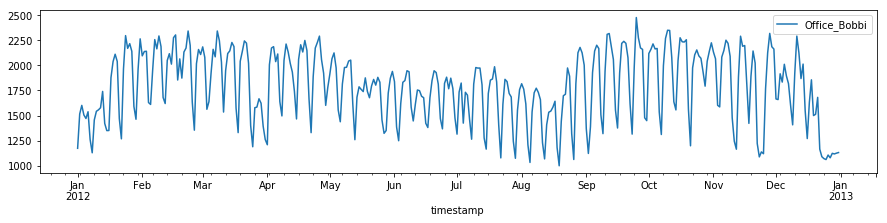

In [14]:
single_building_data.resample("D").sum().plot(figsize=(15,3))

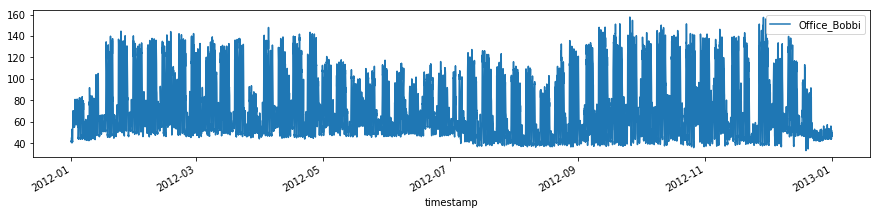

In [15]:
single_building_data.truncate(after='2015-02').plot(figsize=(15,3))

In [16]:
single_building_data.dropna().index.month.isin(["1","2","3","5","6","7","9","10","11"])

array([ True,  True,  True, ..., False, False, False])

In [17]:
trainingdata = single_building_data[single_building_data.index.month.isin(["1","2","3","5","6","7","9","10","11"])]

In [61]:
print(len(trainingdata))

6576


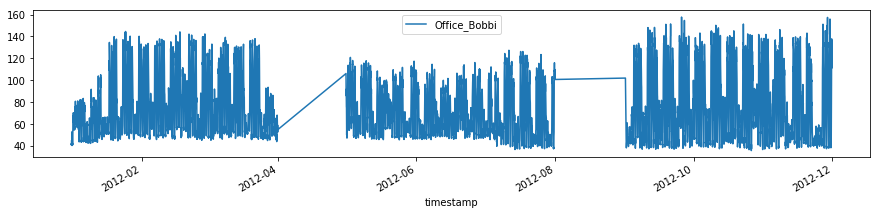

In [18]:
trainingdata.plot(figsize=(15,3))

In [19]:
trainingdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6576 entries, 2012-01-01 00:00:00-08:00 to 2012-11-30 23:00:00-08:00
Data columns (total 1 columns):
Office_Bobbi    6576 non-null float64
dtypes: float64(1)
memory usage: 102.8 KB


In [20]:
testdata = single_building_data[single_building_data.index.month.isin(["4","8","12"])]

In [62]:
print(len(testdata))

2208


In [63]:
print(testdata)

                           Office_Bobbi
timestamp                              
2012-04-01 00:00:00-07:00        53.725
2012-04-01 01:00:00-07:00        61.325
2012-04-01 02:00:00-07:00        53.775
2012-04-01 03:00:00-07:00        56.125
2012-04-01 04:00:00-07:00        53.225
2012-04-01 05:00:00-07:00        54.200
2012-04-01 06:00:00-07:00        52.500
2012-04-01 07:00:00-07:00        48.400
2012-04-01 08:00:00-07:00        47.400
2012-04-01 09:00:00-07:00        52.875
2012-04-01 10:00:00-07:00        47.800
2012-04-01 11:00:00-07:00        45.750
2012-04-01 12:00:00-07:00        49.600
2012-04-01 13:00:00-07:00        47.475
2012-04-01 14:00:00-07:00        47.775
2012-04-01 15:00:00-07:00        46.750
2012-04-01 16:00:00-07:00        47.900
2012-04-01 17:00:00-07:00        47.400
2012-04-01 18:00:00-07:00        47.150
2012-04-01 19:00:00-07:00        47.025
2012-04-01 20:00:00-07:00        47.650
2012-04-01 21:00:00-07:00        49.375
2012-04-01 22:00:00-07:00        51.325


In [21]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2012-04-01 00:00:00-07:00 to 2012-12-31 23:00:00-08:00
Data columns (total 1 columns):
Office_Bobbi    2208 non-null float64
dtypes: float64(1)
memory usage: 34.5 KB


# Building a simple open-source model to fill in the gaps

Using this link as a guide: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In order to fill in the gaps, we will use a very basic implementation of the random forest model implemented in `sci-kit learn` toa fill in the gaps. 

We will use the following features at each timestamp:
- Day of Week
- Hour of Day
- Outdoor Air Temperature

Remember, this is a very simple example.

First, let's grab the weather data

In [22]:
weatherfilename = meta.T[singlebuilding].newweatherfilename

In [23]:
weatherfilename

'weather7.csv'

In [24]:
weather = pd.read_csv(os.path.join("../input/",weatherfilename),index_col='timestamp', parse_dates=True, na_values='-9999')
weather = weather.tz_localize(single_timezone, ambiguous = 'infer')

In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25147 entries, 2012-01-01 00:15:00-08:00 to 2012-12-31 23:55:00-08:00
Data columns (total 16 columns):
Conditions               25147 non-null object
DateUTC<br />            25147 non-null object
Dew PointC               24795 non-null float64
Events                   1055 non-null object
Gust SpeedKm/h           25147 non-null object
Humidity                 24795 non-null float64
Precipitationmm          475 non-null float64
Sea Level PressurehPa    25140 non-null float64
TemperatureC             24795 non-null float64
TimeCDT                  16304 non-null object
TimeCST                  8843 non-null object
VisibilityKm             25129 non-null float64
Wind Direction           25147 non-null object
Wind SpeedKm/h           25137 non-null object
WindDirDegrees           25147 non-null int64
timestamp.1              25147 non-null object
dtypes: float64(6), int64(1), object(9)
memory usage: 3.3+ MB


Let's get only the code

In [26]:
outdoor_temp = pd.DataFrame(weather[[col for col in weather.columns if 'Temperature' in col]]).resample("H").mean()

In [27]:
outdoor_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00-08:00 to 2012-12-31 23:00:00-08:00
Freq: H
Data columns (total 1 columns):
TemperatureC    8585 non-null float64
dtypes: float64(1)
memory usage: 137.2 KB


In [28]:
outdoor_temp = outdoor_temp.reindex(pd.DatetimeIndex(start=outdoor_temp.index[0], periods=len(single_building_data), freq="H")).fillna(method='ffill').fillna(method='bfill')

In [29]:
outdoor_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00-08:00 to 2012-12-31 23:00:00-08:00
Freq: H
Data columns (total 1 columns):
TemperatureC    8784 non-null float64
dtypes: float64(1)
memory usage: 137.2 KB


In [69]:
print(outdoor_temp.index.month)

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=8784)


## Create the training data

In [30]:
outdoor_temp[outdoor_temp.index.month.isin(["1","2","3","5","6","7","9","10","11"])].TemperatureC.values

array([3.        , 3.        , 2.66666667, ..., 2.95      , 1.7       ,
       1.9       ])

In [31]:
pd.get_dummies(trainingdata.index.dayofweek).head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [32]:
train_features = np.array(pd.concat([pd.get_dummies(trainingdata.index.hour),
                                     pd.get_dummies(trainingdata.index.dayofweek),
           pd.Series(outdoor_temp[outdoor_temp.index.month.isin(["1","2","3","5","6","7","9","10","11"])].TemperatureC.values)], axis=1))

In [33]:
train_features.shape

(6576, 32)

In [34]:
train_labels = np.array(trainingdata[singlebuilding].values)

In [71]:
train_labels

array([ 41.775,  42.525,  42.2  , ..., 115.625, 111.275, 129.   ])

In [36]:
train_labels.shape

(6576,)

## Create the test labels data

In [37]:
test_features = np.array(pd.concat([pd.get_dummies(testdata.index.hour),
                                     pd.get_dummies(testdata.index.dayofweek),
           pd.Series(outdoor_temp[outdoor_temp.index.month.isin(["4","8","12"])].TemperatureC.values)], axis=1))

In [38]:
test_labels = testdata[singlebuilding].values


In [39]:
test_labels.shape

(2208,)

## Use a random forest model to predict the test set and calculate the results

### Train Model
After all the work of data preparation, creating and training the model is pretty simple using Scikit-learn. We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. (Again setting the random state for reproducible results). This entire process is only 3 lines in scikit-learn!

In [52]:
print(len(train_features))

6576


In [58]:
print(train_features[2])

[0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         2.66666667]


In [54]:
print(len(train_labels))

6576


In [59]:
print(train_labels[0])

41.775


In [86]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [87]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
grad = GradientBoostingRegressor()
# Instantiate model with 1000 decision trees

In [91]:
# Train the model on training data
grad.fit(train_features, train_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Make Predictions on the Test Set
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the absolute value (as we also did when establishing the baseline).



In [94]:
# Use the forest's predict method on the test data
predictions = grad.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 14.22


In [95]:

# Use the forest's predict method on the test data
predictions = grad.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 14.22


In [96]:
print(predictions)

[ 66.87264563  62.26477272  60.62247957 ... 104.95276598 104.26183692
 101.51652551]


In [97]:
print(len(predictions))

2208


In [105]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 76.06 %.


In [106]:
NMBE = 100 * (sum(test_labels - predictions) / (pd.Series(test_labels).count() * np.mean(test_labels)))
CVRSME = 100 * ((sum((test_labels - predictions)**2) / (pd.Series(test_labels).count()-1))**(0.5)) / np.mean(test_labels)

In [107]:
CVRSME

25.80559491589478

In [108]:
NMBE

-7.337222876261615

Calculate R squared

In [109]:
from sklearn.metrics import r2_score

In [110]:
r2_score(test_labels, predictions)

0.5769718385634879

# Visualize the model

In [111]:
testdata["Prediction"]= predictions

C:\Users\kitkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
testdata.head()

,Office_Bobbi,Prediction
timestamp,,
2012-04-01 00:00:00-07:00,53.725,66.872646
2012-04-01 01:00:00-07:00,61.325,62.264773
2012-04-01 02:00:00-07:00,53.775,60.622480
2012-04-01 03:00:00-07:00,56.125,62.107692
2012-04-01 04:00:00-07:00,53.225,62.107692


In [113]:
testdata.columns = ['Actual','Prediction']

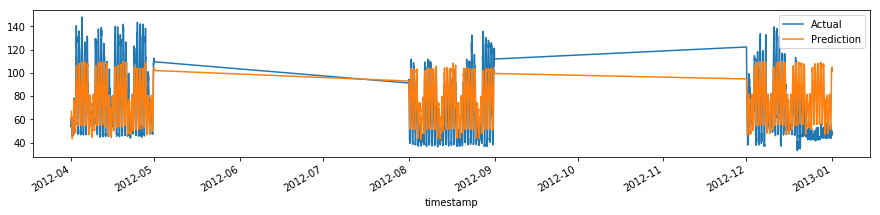

In [114]:
testdata.plot(figsize=(15,3))

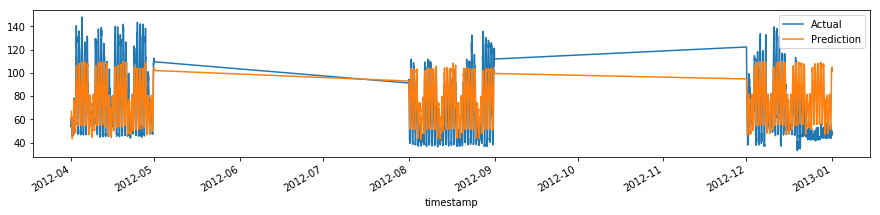

In [115]:
testdata.truncate(after='2015-05-01').plot(figsize=(15,3))

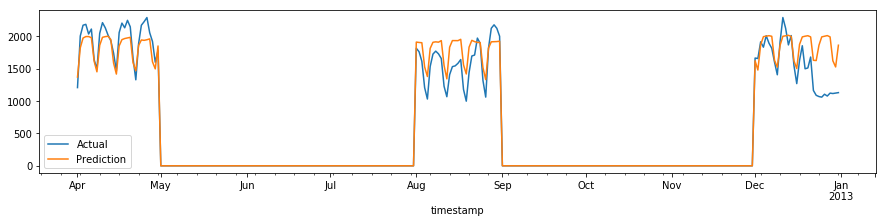

In [116]:
testdata.resample("D").sum().plot(figsize=(15,3))

# Go through and create and test a model for all the buildings in the data set

Let's only look at Office Buildings

In [117]:
buildingnames = temporal.columns[temporal.columns.str.contains("Office")]

In [118]:
buildingnames

Index(['Office_Cristina', 'Office_Jesus', 'Office_Jett', 'Office_Jerry',
       'Office_Lesa', 'Office_Jackie', 'Office_Marla', 'Office_Maryann',
       'Office_Myron', 'Office_Conrad',
       ...
       'Office_Ellie', 'Office_Erik', 'Office_Evelyn', 'Office_Emer',
       'Office_Elena', 'Office_Emerald', 'Office_Ellis', 'Office_Elliot',
       'Office_Eddie', 'Office_Georgia'],
      dtype='object', length=156)

In [119]:
MAPE_data = {}
RSQUARED_data = {}
NMBE_data = {}
CVRSME_data = {}

for singlebuilding in buildingnames[:2]:
    print("Modelling: "+singlebuilding)
#     try:
    # Get Data
    single_timezone = meta.T[singlebuilding].timezone
    single_start = meta.T[singlebuilding].datastart
    single_end = meta.T[singlebuilding].dataend
    single_building_data = pd.DataFrame(temporal[singlebuilding].tz_convert(single_timezone).truncate(before=single_start,after=single_end))

    # Split into Training and Testing
    trainingdata = single_building_data[single_building_data.index.month.isin(["1","2","3","5","6","7","9","10","11"])]
    testdata = single_building_data[single_building_data.index.month.isin(["4","8","12"])]

    # Get weather file
    weatherfilename = meta.T[singlebuilding].newweatherfilename
    print("Weatherfile: "+weatherfilename)
    weather = pd.read_csv(os.path.join("../input/",weatherfilename),index_col='timestamp', parse_dates=True, na_values='-9999')
    weather = weather.tz_localize(single_timezone, ambiguous = 'infer')
    outdoor_temp = pd.DataFrame(weather[[col for col in weather.columns if 'Temperature' in col]]).resample("H").mean()
    outdoor_temp = outdoor_temp.reindex(pd.DatetimeIndex(start=outdoor_temp.index[0], periods=len(single_building_data), freq="H")).fillna(method='ffill').fillna(method='bfill')

    # Create training data array
    train_features = np.array(pd.concat([pd.get_dummies(trainingdata.index.hour),
                                         pd.get_dummies(trainingdata.index.dayofweek),
               pd.Series(outdoor_temp[outdoor_temp.index.month.isin(["1","2","3","5","6","7","9","10","11"])].TemperatureC.values)], axis=1))
    train_labels = np.array(trainingdata[singlebuilding].values)

    # Create test data array
    test_features = np.array(pd.concat([pd.get_dummies(testdata.index.hour),
                                         pd.get_dummies(testdata.index.dayofweek),
               pd.Series(outdoor_temp[outdoor_temp.index.month.isin(["4","8","12"])].TemperatureC.values)], axis=1))
    test_labels = np.array(testdata[singlebuilding].values)

    # Make model
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    # Train the model on training data
    rf.fit(train_features, train_labels);

    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)

    # Calculate mean absolute percentage error (MAPE) and add to list
    MAPE = 100 * np.mean((errors / test_labels))
    NMBE = 100 * (sum(test_labels - predictions) / (pd.Series(test_labels).count() * np.mean(test_labels)))
    CVRSME = 100 * ((sum((test_labels - predictions)**2) / (pd.Series(test_labels).count()-1))**(0.5)) / np.mean(test_labels)
    RSQUARED = r2_score(test_labels, predictions)

    print("MAPE: "+str(MAPE))
    print("NMBE: "+str(NMBE))
    print("CVRSME: "+str(CVRSME))
    print("R SQUARED: "+str(RSQUARED))

    MAPE_data[singlebuilding] = MAPE
    NMBE_data[singlebuilding] = NMBE
    CVRSME_data[singlebuilding] = CVRSME
    RSQUARED_data[singlebuilding] = RSQUARED
        
#     except:
#         print("There was a problem")

Modelling: Office_Cristina
Weatherfile: weather2.csv
MAPE: 17.860039993431283
NMBE: 0.47615706319119927
CVRSME: 21.38414731929372
R SQUARED: 0.5424763390224827
Modelling: Office_Jesus
Weatherfile: weather1.csv
MAPE: 131.03690198838203
NMBE: 8.170788033083864
CVRSME: 31.07398044054783
R SQUARED: 0.34668058317992845


In [120]:
metrics = pd.DataFrame([MAPE_data, NMBE_data, CVRSME_data, RSQUARED_data]).T
metrics.columns = ["MAPE", "NMBE", "CVRSME", "RSQUARED"]

In [121]:
metrics

,MAPE,NMBE,CVRSME,RSQUARED
Office_Cristina,17.860040,0.476157,21.384147,0.542476
Office_Jesus,131.036902,8.170788,31.073980,0.346681


In [122]:
metrics.to_csv("RF_metrics.csv")